In [27]:

import pandas as pd
import plotly.express as px
from data.shared_data import load_data, load_list
import numpy as np
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


df = load_data('combine')
select_list = df['Site'].unique().tolist()


selected_protein = ['HDAC1','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7','HDAC8','HDAC9','HDAC10']
length = len(selected_protein)
select_data = df[df['Site'].isin(selected_protein)]
pivot_data = select_data.pivot_table(index='Site', columns=["Line",'Drug'], values="log2FC")
pivot_data.columns = pivot_data.columns.map('{0[0]}_{0[1]}'.format)
pivot_data=pivot_data.fillna(0)


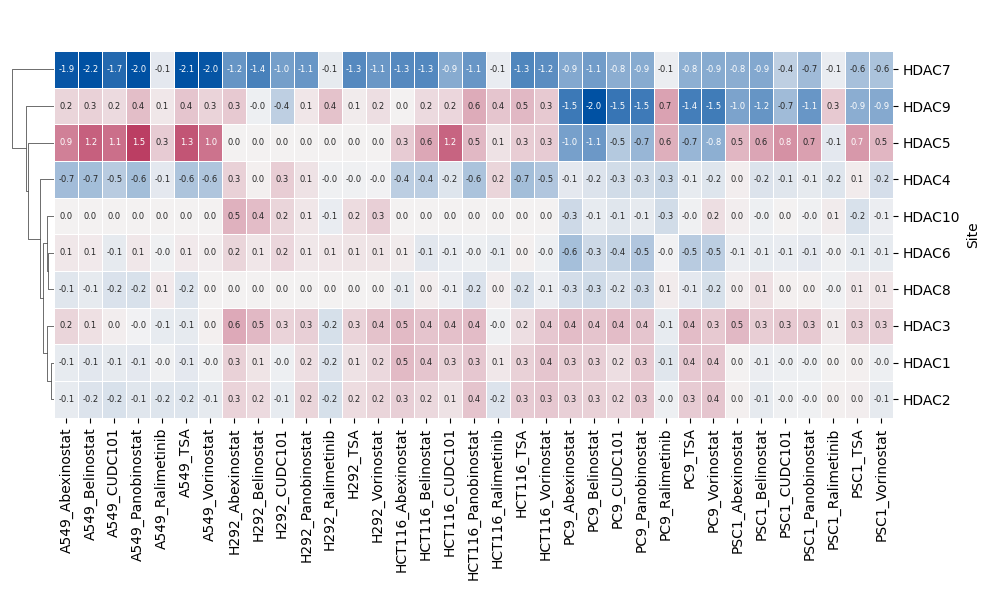

In [28]:

fig = sns.clustermap(pivot_data,
                annot = True,
                cmap= sns.diverging_palette(255, 6, s = 100, l =35, as_cmap=True),
                dendrogram_ratio=(.05, .1), #(row, col)
                row_cluster=True,
                col_cluster=False,
                linewidth=.5,
                fmt = '.1f', cbar = False,
                center = 0,vmin = -2, vmax = 2,
                annot_kws={"size": 6},
                figsize = (10, length/2 + 1))
fig.cax.set_visible(False)
fig.cax.xaxis.tick_top()